In [1]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
data = pd.read_csv('fuel_cons.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
#Lets select some features to explore more
data = data[['ENGINESIZE','CO2EMISSIONS']]


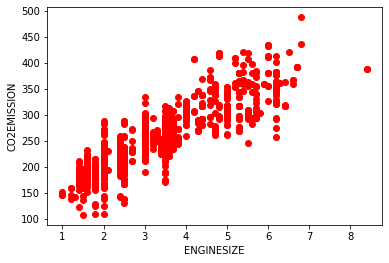

In [4]:
#ENGINE SIZE VS CO@EMISSIONS
plt.scatter(data['ENGINESIZE'],data['CO2EMISSIONS'],color = 'red')
plt.ylabel('CO2EMISSION')
plt.xlabel('ENGINESIZE')
plt.show()

In [5]:
#Genrate training and testing data from our data 
#we are using 80% of data for training

train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

train.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [6]:
test.shape
data.shap


AttributeError: 'DataFrame' object has no attribute 'shap'

In [ ]:
#train our model
regr = linear_model.LinearRegression()

train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])

regr.fit(train_x,train_y)

#the coefficient
print(f'coefficient : {regr.coef_}')

#intercept
print(f'intercept : {regr.intercept_}')

coefficient : [[38.79512384]]
intercept : [127.16989951]


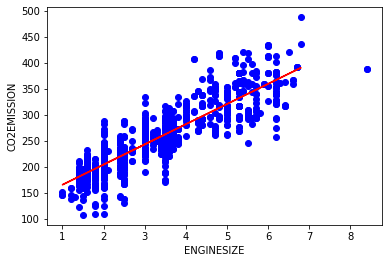

In [ ]:
#PLotting the regression line 
#ENGINE SIZE VS CO2EMISSIONS
plt.scatter(data['ENGINESIZE'],data['CO2EMISSIONS'],color = 'blue')
plt.plot(train_x,regr.coef_*train_x+regr.intercept_,'-r')
plt.ylabel('CO2EMISSION')
plt.xlabel('ENGINESIZE')
plt.show()

In [ ]:
# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

In [ ]:
regr.intercept_[0]
regr.coef_[0][0]

38.795123836056526

In [ ]:
# Predicting emission for future car:
my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ('Estimated Emission :',estimatd_emission)

Estimated Emission : 262.9528329350173


In [ ]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))

Mean absolute error: 20.60


In [ ]:
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))

Mean sum of squares (MSE): 746.45


In [ ]:
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

R2-score: 0.71
